In [2]:
# http://www.laurentluce.com/posts/twitter-sentiment-analysis-using-python-and-nltk/
# Sentiment analysis of tweets
# Get hashtag participants
from matplotlib import pylab as plt
%matplotlib inline 

tweets = []
screen_names = {}
with open("./tracked/cupnacional.txt", 'r') as f:
    for line in f.readlines():
        if line[0:5] != "LINE:":
            continue
        info = line.split("LINE:")[1]
        tweets.append(info.split('\t')[3])

In [3]:
neg_corpus = ['puta', 'puto', 'putos', 
              'traïdors', 'traïdor', 'traïdora', 'traïdores',
              'fàstic', 'fastigós', 'fastigosa', 'fastigosos', 
              'botiflers', 'botifler', 'botiflera', 
              'porcs', 
              'venuts', 'cabrons', 'malparits', 'malparida', 'malparit',
              "tanoques", "galifardeus", "tòtils", "pallussos", "capsigranys", 
              "carallots", "torracollons", "poca-vergonyes", "sòmines", "trossos de quòniam"]

counter = {neg: 0 for neg in neg_corpus}

In [4]:
counter.keys()

['tra\xc3\xafdora',
 'trossos de qu\xc3\xb2niam',
 'torracollons',
 'malparit',
 'poca-vergonyes',
 'tra\xc3\xafdors',
 'venuts',
 'tra\xc3\xafdores',
 'pallussos',
 'tra\xc3\xafdor',
 'malparits',
 'tanoques',
 'puta',
 'puto',
 'fastigosos',
 'f\xc3\xa0stic',
 's\xc3\xb2mines',
 't\xc3\xb2tils',
 'putos',
 'capsigranys',
 'fastigosa',
 'porcs',
 'carallots',
 'botifler',
 'cabrons',
 'fastig\xc3\xb3s',
 'malparida',
 'galifardeus',
 'botiflera',
 'botiflers']

In [5]:
from nltk.tokenize import WordPunctTokenizer, TreebankWordTokenizer

#tokenizer = WordPunctTokenizer() # faster
tokenizer = TreebankWordTokenizer() # slower. Correctly tokens "traïdors"

negatives = 0
for t in tweets:
    # exclude RT
    if "RT" in t:
        continue
        
    text = tokenizer.tokenize(t.lower())

    # does the tweet contain a swear word at all?
    if any(neg in text for neg in counter.keys()):
        negatives +=1
        
        # which word has been seen?
        for neg in counter.keys():
            if neg in text:
                counter[neg]+=1

In [6]:
print 'Tweets negatius (abs):', negatives
print 'Tweets negatius (%):', 100.0*negatives/len(tweets)

Tweets negatius (abs): 630
Tweets negatius (%): 0.822884012539


In [7]:
counter

{'botifler': 13,
 'botiflera': 7,
 'botiflers': 180,
 'cabrons': 6,
 'capsigranys': 1,
 'carallots': 2,
 'fastigosa': 2,
 'fastigosos': 2,
 'fastig\xc3\xb3s': 5,
 'f\xc3\xa0stic': 46,
 'galifardeus': 2,
 'malparida': 0,
 'malparit': 2,
 'malparits': 3,
 'pallussos': 0,
 'poca-vergonyes': 0,
 'porcs': 8,
 'puta': 128,
 'puto': 19,
 'putos': 17,
 's\xc3\xb2mines': 0,
 'tanoques': 2,
 'torracollons': 1,
 'tra\xc3\xafdor': 22,
 'tra\xc3\xafdora': 5,
 'tra\xc3\xafdores': 1,
 'tra\xc3\xafdors': 172,
 'trossos de qu\xc3\xb2niam': 0,
 't\xc3\xb2tils': 0,
 'venuts': 21}

In [8]:
ranking = sorted(counter.items(), key=lambda x: x[1], reverse=True)

In [9]:
ranking

[('botiflers', 180),
 ('tra\xc3\xafdors', 172),
 ('puta', 128),
 ('f\xc3\xa0stic', 46),
 ('tra\xc3\xafdor', 22),
 ('venuts', 21),
 ('puto', 19),
 ('putos', 17),
 ('botifler', 13),
 ('porcs', 8),
 ('botiflera', 7),
 ('cabrons', 6),
 ('tra\xc3\xafdora', 5),
 ('fastig\xc3\xb3s', 5),
 ('malparits', 3),
 ('malparit', 2),
 ('tanoques', 2),
 ('fastigosos', 2),
 ('fastigosa', 2),
 ('carallots', 2),
 ('galifardeus', 2),
 ('torracollons', 1),
 ('tra\xc3\xafdores', 1),
 ('capsigranys', 1),
 ('trossos de qu\xc3\xb2niam', 0),
 ('poca-vergonyes', 0),
 ('pallussos', 0),
 ('s\xc3\xb2mines', 0),
 ('t\xc3\xb2tils', 0),
 ('malparida', 0)]

In [11]:
counts = [v for k,v in ranking]
words = [k.decode('utf-8') for k,v in ranking]

### Ranking d'insults

[]

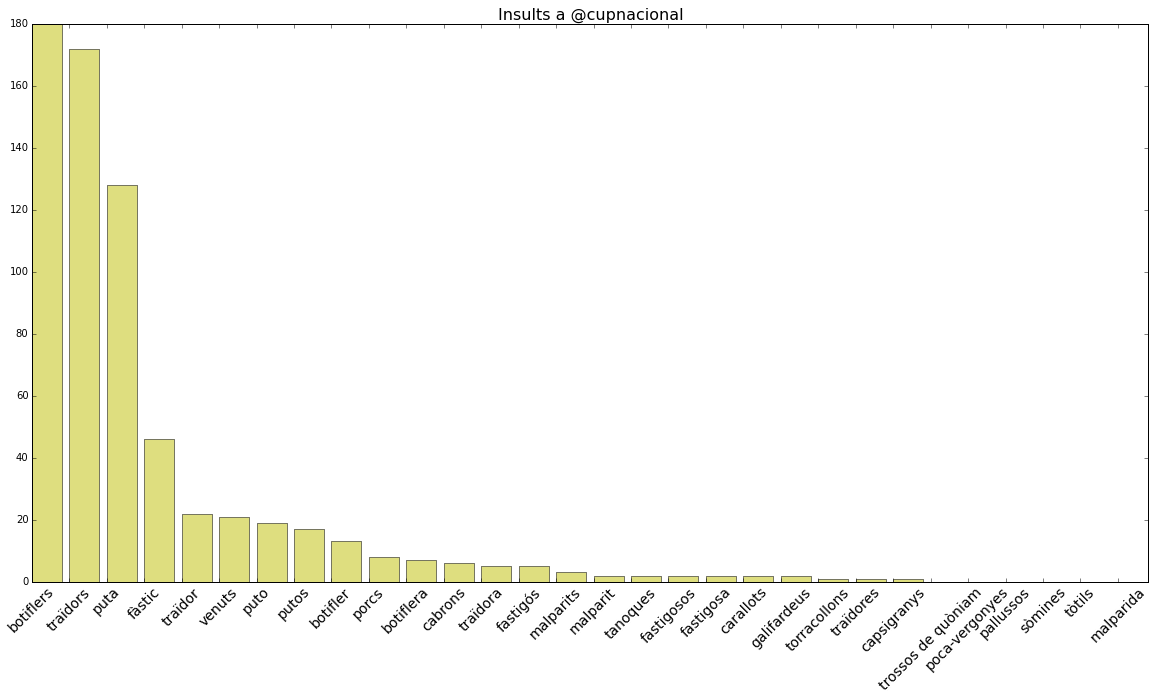

In [13]:
import numpy as np
fig, ax = plt.subplots(figsize=(20,10))
x = np.arange(len(counts))
ax.bar(x, counts, color='y', alpha=0.5)
ax.set_xticks(x+0)
ax.set_xticklabels(words, size=14, rotation=45)
ax.set_title('Insults a @cupnacional', size=16)
plt.plot()
